In [2]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

engine = psycopg2.connect(
    database="final-frontier2",
    user="postgres",
    password="TypicalParkerLuck",
    host="final-frontier.czribcwnemzt.us-east-1.rds.amazonaws.com",
    port='5432',
    connect_timeout=3)

#engine #.table_names()
cursor = engine.cursor()

In [3]:
# Select home player roster for when MUN played at Liverpool

drop_Query = "drop table if exists livvman;"
cursor.execute(drop_Query)


sel_liv_home_Query = "select distinct p.player_name, p.player_api_id, m.home_team_api_id \
                into temporary table livvman from player p, \
                match m where ((p.player_api_id = m.home_player_1) \
                               or (p.player_api_id = m.home_player_2) \
                               or (p.player_api_id = m.home_player_3) \
                               or (p.player_api_id = m.home_player_4) \
                               or (p.player_api_id = m.home_player_5) \
                               or (p.player_api_id = m.home_player_6) \
                               or (p.player_api_id = m.home_player_7) \
                               or (p.player_api_id = m.home_player_8) \
                               or (p.player_api_id = m.home_player_9) \
                               or (p.player_api_id = m.home_player_10) \
                               or (p.player_api_id = m.home_player_11)) \
                and ((m.home_team_api_id = 8650) and (away_team_api_id = 10260));"

cursor.execute(sel_liv_home_Query)
join_liv_home_Query = "select * from livvman \
                  left join player_attributes \
                  on livvman.player_api_id = player_attributes.player_api_id;"
cursor.execute(join_liv_home_Query)

liverpool_home = cursor.fetchall()
liv_home_df = pd.DataFrame(liverpool_home,columns=['player_name','player_api_id','home_team_api_id','id',\
                'player_fifa_api_id','player_api_id-2','date','overall_rating','potential','preferred_foot','attacking_work_rate',\
                'defensive_work_rate','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve',\
                'free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance',\
                'shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties',\
                'marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'])


liv_home_df['date'] = pd.to_datetime(liv_home_df['date']).dt.date

#df['birth_date'] > start_date) & (df['birth_date'] <= end_date

#mask = (liv_home_df['date'] = '2011-03-06') # & (liv_home_df['date'] <= '2011-03-07')

#df = liv_home_df.loc['date' = '2011-03-06']

df

SyntaxError: invalid syntax (<ipython-input-3-c468d4e221d1>, line 41)

In [22]:
#data = liv_home_df[["overall_rating","potential","agility","shot_power","strength","aggression"]]
data = liv_home_df[["overall_rating","aggression"]]
cdata = data.dropna(how='any')
#data = data.apply(pd.to_numeric, errors='coerce')

#data.replace('', np.nan, inplace=True)
data.isnull().sum().sum()
#cleandata

6

In [23]:
#data = liv_home_df['overall_rating','potential','agility','shot_power','strength','agression']  # load data set
X = cdata.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = cdata.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

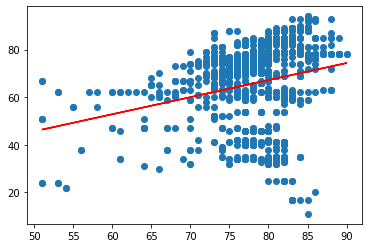

In [24]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()